In [22]:
# Définition d'anneaux de polynômes univariés sur des corps finis pour des tests (rajouter les autres corps pq pas les extensions?)
Ring_A.<x> = PolynomialRing(GF(2))
Ring_B.<x> = PolynomialRing(GF(3))
Ring_C.<x> = PolynomialRing(GF(5))
Ring_D.<x> = PolynomialRing(GF(2^2))
Ring_E.<x> = PolynomialRing(GF(3^2))
Ring_F.<x> = PolynomialRing(GF(5^2))

# Définition de matrices à coefficients dans les anneaux de polynômes pour des tests.

Matrix_A = Matrix(Ring_A, [[1, 0, 1, 1],
                           [x, 1, 1+x, 0],
                           [1, x^2+x^3, x, 0],
                           [x^2, 0, x^3+x^4, 0]])

Vector_s = vector(ZZ, [1, 0, 0, 1])

1


In [29]:
def row_degree(M):
    """
    Calcule le degré maximal des polynômes de chaque ligne d'une matrice M.

    Arguments :
    M -- une matrice dont les entrées sont des polynômes

    Retourne :
    Une matrice 1 × r contenant les degrés maximaux de chaque ligne.
    """
    r = M.nrows()  # Nombre de lignes
    c = M.ncols()  # Nombre de colonnes

    # Création d'une matrice 1 x r pour stocker les degrés maximaux
    row_degree = Matrix(ZZ, 1, r)

    # Parcours des lignes pour trouver le degré maximal de chaque ligne
    for i in range(r):
        row_degree[0, i] = max(M[i, j].degree() for j in range(c))  # Calcul du degré max de la ligne i

    return row_degree

def shifted_row_degree(M, s):
    """
    Calcule le degré maximal des polynômes de chaque ligne d'une matrice M, en appliquant un décalage spécifique à chaque ligne.

    Arguments :
    M -- une matrice dont les entrées sont des polynômes
    s -- un vecteur contenant les valeurs de décalage (shift) pour chaque ligne

    Retourne :
    Une matrice 1 × r contenant les degrés maximaux de chaque ligne après application du décalage.
    """
    r = M.nrows()  # Nombre de lignes
    c = M.ncols()  # Nombre de colonnes

    # Création d'une matrice 1 x r pour stocker les degrés maximaux
    shifted_row_degree = Matrix(ZZ, 1, r)

    # Parcours des lignes pour trouver le degré maximal de chaque ligne
    for i in range(r):
        shifted_row_degree[0, i] = max((M[i, j].degree()+s[j]) for j in range(c))  # Calcul du degré max de la ligne i

    return shifted_row_degree    

In [30]:
row_degree(Matrix_A)
shifted_row_degree(Matrix_A, Vector_s)

[1 2 3 4]

In [81]:
def proj(u, v):
    """
    Calcule la projection orthogonale du vecteur v sur le vecteur u.

    La projection orthogonale proj(u, v) est donnée par la formule :
    proj(u, v) = (u . v / u . u) * u
    où '.' désigne le produit scalaire. Ce calcul donne la composante de v dans 
    la direction de u, c'est-à-dire la projection de v sur la droite définie par u.

    Arguments :
    u : Vecteur sur lequel projeter le vecteur v.
    v : Vecteur à projeter.

    Retourne :
    Un vecteur représentant la projection orthogonale de v sur u.
    """
    return u * u.dot_product(v) / u.dot_product(u)

In [43]:
v*3

(3, 6, 9)

In [89]:
latex(row_degree(Matrix_A))

\left(\begin{array}{rrrr}
0 & 1 & 3 & 4
\end{array}\right)

In [86]:
row_degree?

In [102]:
M = Matrix(RR, [[3, 1],
                [1, 2]])#il vaut mieux travailler avec une matrice

def Gram_Schmidt(B):
    """
    Applique l'algorithme de Gram-Schmidt pour orthogonaliser un ensemble de vecteurs.

    L'algorithme de Gram-Schmidt prend en entrée une liste de vecteurs linéairement indépendants
    et les transforme en un ensemble de vecteurs orthogonaux. La sortie est une matrice où chaque
    colonne est un vecteur orthogonal par rapport aux précédents.

    Arguments :
    V : Matrice de vecteurs (de dimension n) à orthogonaliser.
        Chaque colonne de V représente un vecteur de l'ensemble initial.

    Retourne :
    Une matrice U contenant les vecteurs orthogonaux obtenus après l'orthogonalisation.
    La matrice U est de même taille que V mais avec des vecteurs orthogonaux.

    Exemple :
    Si V est une matrice 2x2, Gram_Schmidt renverra une matrice 2x2 avec des colonnes orthogonales.
    """
    
    # Initialisation de la matrice U pour stocker les vecteurs orthogonaux
    B_star = Matrix(RR, B.nrows(), B.ncols())
    U = Matrix(RR, B.nrows(), B.ncols())
    B_star[0] = B[0]  # Le premier vecteur de V est copié dans U

    # Processus de Gram-Schmidt pour chaque vecteur de V
    for k in range(B.nrows()):
        # Soustraction des projections sur les vecteurs précédemment orthogonalisés
        B_star[k] = B[k] - sum(proj(B_star[j], B[k]) for j in range(k))

    # Retourne la matrice des vecteurs orthogonaux transposée
    return B_star

# Exemple d'utilisation :
# Gram_Schmidt(V) renvoie une matrice contenant les vecteurs orthogonaux.

Gram_Schmidt(M)

[  3.00000000000000   1.00000000000000]
[-0.500000000000000   1.50000000000000]

In [84]:
from sage.plot.point import Point
P = Point([1,2],[2,3],{'alpha':.5})
P
P.options()['alpha']
P.xdata

[1, 2]

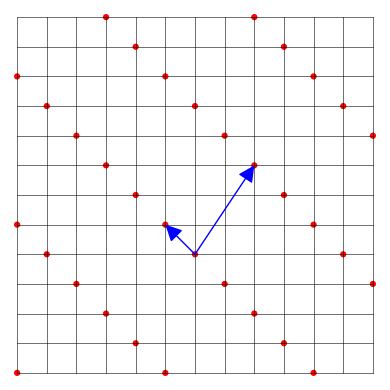

In [78]:
# Afficher plusieurs points sans les axes
graphic = Graphics()
for x in range(-5, 8):
    graphic += line([(x, 0), (x, 12)], color='black', thickness=0.4)
    
for x in range(0, 13):
    graphic += line([(-5, x), (7, x)], color='black', thickness=0.4)

graphic += points([(2*i-j, 3*i+j) for i in range(-5, 12) for j in range(-5, 12) if 7>=2*i-j>=-5 and 0<=3*i+j<=12], color='red', size=20)

graphic += arrow((1, 4), (3, 7), color='blue', width=1)
graphic += arrow((1, 4), (0, 5), color='blue', width=1)



p = plot(graphic)

p.show(axes=False, aspect_ratio=1)

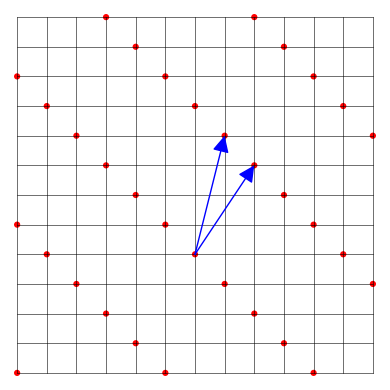

In [86]:
# Afficher plusieurs points sans les axes
graphic = Graphics()
for x in range(-5, 8):
    graphic += line([(x, 0), (x, 12)], color='black', thickness=0.4)
    
for x in range(0, 13):
    graphic += line([(-5, x), (7, x)], color='black', thickness=0.4)

graphic += points([(2*i-j, 3*i+j) for i in range(-5, 12) for j in range(-5, 12) if 7>=2*i-j>=-5 and 0<=3*i+j<=12], color='red', size=20)

graphic += arrow((1, 4), (3, 7), color='blue', width=1)
graphic += arrow((1, 4), (2, 8), color='blue', width=1)


p = plot(graphic)

p.show(axes=False, aspect_ratio=1)

p.save("mon_graphique.png", dpi=300, axes=False, aspect_ratio=1)



In [64]:
#je vais essayer de faire un algo pour représenter un réseau en 2D avec la base donnée

#entrée : une base du réseau

#sortie : un affichage du reseau euclidien
L=Matrix(ZZ, [[-1,1],
              [3,4]])

def draw_2D_lattice(L, save=False, name="graphic"):
    """
    Fonction pour dessiner un réseau 2D à partir d'une base donnée.

    Paramètres :
    - L : Matrice 2x2 représentant la base du réseau.
    - save : Booléen indiquant s'il faut enregistrer l'image générée.
    - name : Nom du fichier si l'enregistrement est activé.

    Affiche le réseau sous forme de points rouges et ajoute une grille pour
    faciliter la lecture de la structure du réseau.
    """

    graphic = Graphics()

    #dessin du grillage derriere
    for x in range(0, 14):
        graphic += line([(x, 0), (x, 13)], color='black', thickness=0.4)
        graphic += line([(0, x), (13, x)], color='black', thickness=0.4)

    graphic += points([(L[0][0] * i + L[0][1]*j,
                        L[1][0] * i + L[1][1]*j) 
                       for i in range(-12, 12) 
                       for j in range(-12, 12) 
                       if 13>=L[0][0]*i+L[0][1]*j>=0 and 0<=L[1][0]*i+L[1][1]*j<=13],
                      color='red', size=30)

    #graphic += arrow((1, 4), (3, 7), color='blue', width=1)
    #graphic += arrow((1, 4), (2, 8), color='blue', width=1)

    p = plot(graphic)

    p.show(axes=False, aspect_ratio=1)
    if(save):
        p.save(name+".png", dpi=300, axes=False, aspect_ratio=1)

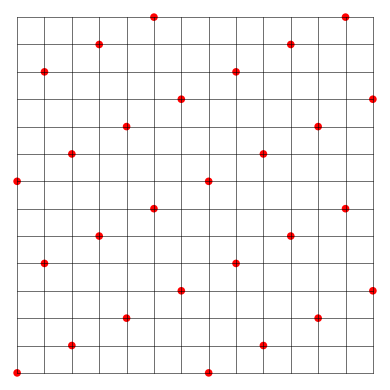

In [66]:
draw_2D_lattice(L, save=True)

In [67]:
L=Matrix(ZZ, [[-1,1, 3],
              [3, 4, 2],
              [1, 5, 3]])

def draw_3D_lattice(L):
    graphic = Graphics()

    for i in range(10):
        graphic += points([(L[0][0] * i + L[0][1] * j + L[0][2] * k, 
                            L[1][0] * i + L[1][1] * j + L[1][2] * k,  
                            L[2][0] * i + L[2][1] * j + L[2][2] * k) 
                           for i in range(-12, 12) 
                           for j in range(-12, 12) 
                           for k in range(-12, 12) 
                           if 13>=L[0][0] * i + L[0][1] * j + L[0][2] * k>=0 and 0<=L[1][0] * i + L[1][1] * j + L[1][2] * k<=13 and 0<=L[2][0] * i + L[2][1] * j + L[2][2] * k<=13], color='red', size=30)

    p = plot(graphic)

    p.show(axes=False, aspect_ratio=1)

In [68]:
draw_3D_lattice(L)

Graphics3d Object

In [41]:
grapihc=Graphics()
graphic+=points([2,3,4])
p=plot(graphic)
p.show()

Graphics3d Object

In [108]:
import random

def random_lattice(d, coeff_range=(-10, 10)):
    """
    Génère une base aléatoire d'un réseau euclidien en dimension d.

    Paramètres :
    - d : Dimension du réseau.
    - coeff_range : Tuple (min, max) définissant l'intervalle des coefficients.

    Retourne :
    - Une matrice inversible aléatoire dxd sur ZZ.
    """
    while True:
        L = Matrix(ZZ, [[random.randint(coeff_range[0], coeff_range[1]) for _ in range(d)] for _ in range(d)])
        if L.det() != 0:  # Vérifie que la matrice est inversible
            return L

# Exemple : Générer un réseau 5D avec des coefficients entre -10 et 10
L = random_lattice(50, (-10, 10))
print(L)


[ 10  -1  -2   6   0   4   5   0  -6  -3  -2  -3 -10   0   2  10   8  -5   7  -4  -7   1   4   8   1 -10 -10  -3  -5 -10   4   5 -10   9   0  -7   7   2   2 -10  10   5  -8  -7   3   9  -2  -9  -1  -5]
[  3  -8  -5  -4  -2   9   8   6 -10  -9 -10  10  -3   3  -1   4  -1  10   1  -8   2   6   8   2  -7  -3   7   4  -5  10  -1  -4  -4   6  -6   4  -7  -1 -10  -1  -9  -1   1   6  -7  -4  -4   0  -4  -1]
[  1   0   0   5  -3   8 -10 -10   8   8  -5  -4   7 -10   6   0  -7  -4  -6   3   2   6  -8   3   5  -3   6  -9   4   1   8   5  -1  -7   1   6  -1 -10   9   3   4   2   2   5  -4  -6   2 -10   1  -2]
[  1  -3  -7  -3  -8   8  -4   4  -9   6   6  -5  -5   0  -6   8   1   5  -9   7  -1   2   0 -10  -6  -8  -1  -4 -10  -2   9   8 -10  10  -8  -8  -4  10   3  -1   9  -3   4  -5 -10   7   4   7   6   5]
[  1   9  -2   9  -1 -10  -5   4   0  -5  -3 -10   1  -9  -9  -5   4  -4 -10   3   9   3   4  10  -8   0   0   1  -9   1  -3   8  -3   8   8  -7  -6  -9   4  -7 -10   0 -10  -7  -6   0   0   4

In [111]:
(L*Gram_Schmidt(L).inverse()).str()

'[     0.999999999999990  -3.81552428541099e-15  -3.92394450265954e-15   4.60742555219440e-15  -2.69922972861991e-15   3.13291059761411e-15   1.83013326715553e-16   3.48679418671338e-16  -3.61689844741164e-15   4.05491612509579e-16   1.11022302462516e-16   1.22471477403963e-15  -2.48065457064683e-16  -4.87804241444678e-15  -1.62023172656234e-15  -1.49186218934005e-16   9.54618328830037e-15  -6.08020578329871e-16  -3.74700270810990e-15  -7.68634288161874e-15  -3.35495520253914e-15  -9.02056207507940e-17   6.55421897310937e-15   1.11716191852906e-15  -7.58768048392255e-15   2.23996168835505e-15   3.22832038879284e-15  -6.50174358796107e-15   4.53109771925142e-15  -5.81912990016420e-15  -1.31492039479042e-15   2.00534033822919e-15  -3.44863027024189e-15  -1.50400525367189e-14   1.56125112837913e-16   4.03843625207401e-15   5.40539835114373e-15  -1.05124242644195e-15   3.01321467777171e-15  -3.51281503885303e-15  -1.28716481917479e-15   7.52176099183544e-15  -7.72992780895265e-15  -4.99600

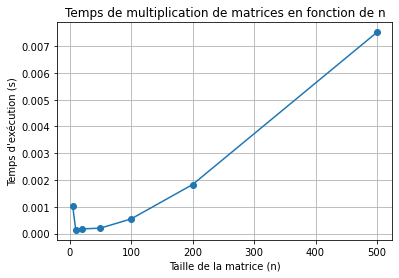

In [115]:
import time
import matplotlib.pyplot as plt

# Fonction pour générer une matrice aléatoire et mesurer le temps de multiplication
def mesure_temps_multiplication(n):
    A = random_matrix(GF(7), n, n)  # Matrice aléatoire dans les rationnels
    B = random_matrix(GF(7), n, n)
    
    start_time = time.time()
    C = A * B  # Multiplication des matrices
    end_time = time.time()
    
    return end_time - start_time  # Temps d'exécution en secondes

# Tester plusieurs tailles de matrices
tailles = [5, 10, 20, 50, 100, 200, 500]  # Tailles de matrices à tester
temps = [mesure_temps_multiplication(n) for n in tailles]

# Affichage des résultats
plt.plot(tailles, temps, marker='o', linestyle='-')
plt.xlabel("Taille de la matrice (n)")
plt.ylabel("Temps d'exécution (s)")
plt.title("Temps de multiplication de matrices en fonction de n")
plt.grid(True)
plt.show()


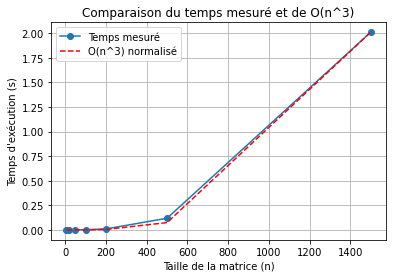

In [114]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour générer une matrice aléatoire et mesurer le temps de multiplication
def mesure_temps_multiplication(n):
    A = random_matrix(QQ, n, n)  # Matrice aléatoire dans les rationnels
    B = random_matrix(QQ, n, n)
    
    start_time = time.time()
    C = A * B  # Multiplication des matrices
    end_time = time.time()
    
    return end_time - start_time  # Temps d'exécution en secondes

# Tester plusieurs tailles de matrices
tailles = [5, 10, 20, 50, 100, 200, 500, 1500]  # Tailles de matrices à tester
temps = [mesure_temps_multiplication(n) for n in tailles]

# Normalisation pour la courbe de référence (éviter des valeurs trop grandes)
facteur_norm = temps[-1] / (tailles[-1] ** 3)  # On normalise pour faire coller à la dernière valeur

# Courbe théorique (O(n^3))
temps_theorique = [facteur_norm * (n ** 3) for n in tailles]

# Affichage des résultats
plt.plot(tailles, temps, marker='o', linestyle='-', label="Temps mesuré")
plt.plot(tailles, temps_theorique, linestyle='--', color='red', label="O(n^3) normalisé")

plt.xlabel("Taille de la matrice (n)")
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison du temps mesuré et de O(n^3)")
plt.legend()
plt.grid(True)
plt.show()
